# **Theme 3: Data Democratization**
## Problem Description - 

- Data Analytics: Broader set of roles, approaches, and analysis on data, shorten the time taken to derive insights that fuel business decisions and customer behaviour


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# $Team: PSGS$
## $Members:$
*   $Shivani\ Bhinge$
*   $Gayatri\ Bhatambarekar$
*   $Swarnim\ Rai$
*   $Piyush\ Nagpal$

<a id="importing-relevant-python-packages"></a>
## Importing Relevant Python Packages

In [ ]:
# importing necessary Python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go 
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from multiscorer import MultiScorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.cluster import KMeans
import xgboost as xgb
import time

In [ ]:
# Connect to gDrive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# unzip the dataset

!unzip gdrive/MyDrive/Possibilities\ Hackathon/dataset/data.zip

Archive:  gdrive/MyDrive/Possibilities Hackathon/dataset/data.zip
  inflating: online_retail_II.csv    


<a id='importing-relevant-data'></a>
## Importing Relevant Data

In [ ]:
# Loading the data
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


<a id='data-engineering'></a>
## Data Engineering

In this section, we will explore the given dataset to answer some general questions about the dataset. This will lead to cause us to introduce other features into the dataset which will help us to build a machine learning model that will help us to answer our main question.

Let's update the pandas dataframe `df` by renaming some of its columns.

In [ ]:
# Rename the following columns: 
#    Invoice to InvoiceNo
#    Customer ID to CustomerID
#    Price to UnitPrice

df.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


We can check information about the dataframe with the `info` method. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   UnitPrice    1067371 non-null  float64
 6   CustomerID   824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


From the output of the `info` method, we can see that the __CustomerID__ and __Description__  columns are likely to have missing values. Also we may want to change the data type of the objects in the __InvoiceDate__ column to proper date objects with the `to_datetime` method. 

Let's count the number of missing values in each column of the dataframe.

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

As predicted, the columns __CustomerID__ and __Description__ have $243007$ and $4382$ missing data respectively. The missing data in the __CustomerID__ column represents $22.77\%$ of the entire online customers. 

In [ ]:
print('The missing data in the CustomerID column represents  {}%  of the entire online customers.'.format(np.round(df.isnull().sum()["CustomerID"]/df.InvoiceNo.shape[0] * 100, 2)))

The missing data in the CustomerID column represents  22.77%  of the entire online customers.


How do we deal with these missing data? After talking to the company leaders, they suggested that the item that has a missing __CustomerID__ should be deleted. One can achieve this with the `dropna` method.

In [ ]:
df_data = df.dropna()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    824364 non-null  object 
 1   StockCode    824364 non-null  object 
 2   Description  824364 non-null  object 
 3   Quantity     824364 non-null  int64  
 4   InvoiceDate  824364 non-null  object 
 5   UnitPrice    824364 non-null  float64
 6   CustomerID   824364 non-null  float64
 7   Country      824364 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 56.6+ MB


Next, we update the dataframe `df_data` by converting the date field, __InvoiceDate__ to _datetime_ object. One can use the `to_datetime` method to achieve this.

In [ ]:
df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
pd.DataFrame(df_data.InvoiceDate.describe())

,InvoiceDate
count,824364
unique,41439
top,2011-11-14 15:27:00
freq,543
first,2009-12-01 07:45:00
last,2011-12-09 12:50:00


From the above, we see that the online purchases made by customers was from 2009-12-01  to 2011-12-09.

In the subsequent cells, we will answer some questions we would like to know from the given dataset.

<a id='exp-qxn-1'></a>
---
> How many online customers are there in the dataset and what is their country of origin?
---

In [ ]:
print('From the dataset, the online retail shop has {} customers \
from {} different countries.'.format(len(df_data.CustomerID.unique()), len(df_data.Country.unique())))

From the dataset, the online retail shop has 5942 customers from 41 different countries.


<a id='exp-qxn-2'></a>
---
> What are the countries that are most represented in the dataset?
---

In [ ]:
ctm_cntry_df = df_data.groupby(['CustomerID', 'Country']).count().reset_index()

ctm_cntry_df = ctm_cntry_df.groupby('Country')['CustomerID'].count().reset_index().sort_values(
    by=['CustomerID'], ascending=False)

# Create a new column, Percentage to calculate the customer representation in percentage
ctm_cntry_df['Percentage']= np.round(ctm_cntry_df.CustomerID / ctm_cntry_df.CustomerID.sum() * 100, 2)

ctm_cntry_df.head(10)

,Country,CustomerID,Percentage
38,United Kingdom,5410,90.85
14,Germany,107,1.80
13,France,95,1.60
32,Spain,41,0.69
3,Belgium,29,0.49
28,Portugal,24,0.40
24,Netherlands,23,0.39
34,Switzerland,22,0.37
33,Sweden,19,0.32
18,Italy,17,0.29


The output above, shows the top $10$ countries of that purchase from the online retail shop with the _United Kingdom_ being the country with the highest customers. They represent about $90.85\%$ of the entire online customers. 

Although $13$ online customers indicated that they were living in two countries, this does not significantly affect the values percetage values recorded. For these $13$ online customers, it may be that the countries recorded for their last purchases is where they are currently living.

In [ ]:
# Initialise a dict object. This is supposed to collect all customers who indicated more than 1 country
ctm_2_cntry = {} 

# for each index and customer id
for idx, cid in enumerate(df_data.CustomerID.unique()):
    
    # Get the country that the customer resides
    cntry = df_data[df_data.CustomerID == cid].Country.unique()
    
    # if customer has lived in more than 1 country
    if len(cntry) > 1: 
        
        # Update the ctm_2_cntry
        ctm_2_cntry[cid] = cntry

pd.DataFrame(ctm_2_cntry) # Create a pandas dataframe using ctm_2_cntry

,12417.0,12455.0,12422.0,12431.0,12745.0,12370.0,12429.0,12423.0,12449.0,12457.0,12652.0,12413.0,12394.0
0,Belgium,Cyprus,Australia,Belgium,EIRE,Austria,Denmark,Denmark,Denmark,Switzerland,Germany,Spain,Belgium
1,Spain,Spain,Switzerland,Australia,United Kingdom,Cyprus,Austria,Belgium,Belgium,Cyprus,France,France,Denmark


In the two next cells, we group countries with customer percentage value less than or equal to $0.25$ together and then plot a pie chart. 

In [ ]:
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
ctm_cntry_df['CountryCategory'] = ctm_cntry_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

ctm_cntry_df.loc[ctm_cntry_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'

ctm_cntry_df.head(11)

,Country,CustomerID,Percentage,CountryCategory
38,United Kingdom,5410,90.85,United Kingdom
14,Germany,107,1.80,Germany
13,France,95,1.60,France
32,Spain,41,0.69,Spain
3,Belgium,29,0.49,Belgium
28,Portugal,24,0.40,Portugal
24,Netherlands,23,0.39,Netherlands
34,Switzerland,22,0.37,Switzerland
33,Sweden,19,0.32,Sweden
18,Italy,17,0.29,Italy


In [ ]:

bar_fig = px.bar(ctm_cntry_df, 
                 x="CountryCategory", y="Percentage", color="CountryCategory", title="Customer Country Count in Percentage",)

bar_fig.update_layout(title_x=0, 
                      legend_title="Countries Represented", 
                      legend=dict(orientation="h")
                     )

bar_fig.show(config={'displaylogo': False})

<a id='exp-qxn-3'></a>
> Calculate the revenue that was made in each month and what is the percentage revenue based on countries?
---

In [ ]:
df_data['InvoiceYearMonth'] = df_data['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912


In [ ]:
df_data['Revenue'] = df_data.UnitPrice * df_data.Quantity
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0


In [ ]:
ctm_revenue = df_data.groupby('InvoiceYearMonth').Revenue.sum().reset_index()
ctm_revenue

,InvoiceYearMonth,Revenue
0,200912,663272.050
1,201001,531952.902
2,201002,489399.586
3,201003,635996.481
4,201004,560635.022
5,201005,559924.550
6,201006,571459.910
7,201007,562785.900
8,201008,587256.460
9,201009,781033.301


In [ ]:
pd.DataFrame(ctm_revenue.Revenue.describe())

,Revenue
count,2.500000e+01
mean,6.659317e+05
std,2.154966e+05
min,3.425244e+05
25%,5.599246e+05
50%,5.872565e+05
75%,7.810333e+05
max,1.134879e+06


In [ ]:
# plot line plot
line_fig = px.line(ctm_revenue, 
                   x = "InvoiceYearMonth", 
                   y = "Revenue", 
                   title = "Montly Revenue from Dec. 2009 to Dec. 2011", 
                   markers=True
                  )

line_fig.update_layout(title_x=0.5, 
                       showlegend=False, 
                       xaxis={"type": "category"}, 
                       xaxis_title="Invoice Year-Month", 
                       yaxis_title="Monthly Revenue"
                      )

line_fig.show(config={'displaylogo': False})

From the graph figure above, we observe that the online retail shop made the highest sales in November 2010, followed by November 2011. Also, one can observe that, monthly sales rises after August. 

Next, explore the percentage revenue generated by the retail shop based on the countries their customers reside.

In [ ]:
cntry_revenue_df = df_data.groupby(['Country']).Revenue.sum().reset_index().sort_values(by=['Revenue'], 
                                                                                        ascending=False)

cntry_revenue_df['Percentage'] = np.round(cntry_revenue_df.Revenue / cntry_revenue_df.Revenue.sum() * 100, 2)

cntry_revenue_df.head(5)

,Country,Revenue,Percentage
38,United Kingdom,1.380642e+07,82.93
10,EIRE,5.785016e+05,3.47
24,Netherlands,5.485249e+05,3.29
14,Germany,4.179886e+05,2.51
13,France,3.265047e+05,1.96


From the output above, the top $5$ countries with respect to revenue generated are:
 * The United Kingdom
 * The Republic of Ireland (EIRE)
 * The Netherlands 
 * Germany 
 * France

with the _United Kingdom_ recording the highest in percentage $(82.93\%)$. 

In the next two cells, we update `cntry_revenue_df` with a new 

In the two next cells, we group countries with revenue percentage value less than or equal to $0.25$ together and then plot a bargraph. 

In [ ]:
percent_margin = 0.25

# Create a new column, CountryCategory and set values to the corresponding values of the Country column
cntry_revenue_df['CountryCategory'] = cntry_revenue_df.Country

# Set Countries with Percentage less than or equal to percent_margin to 'Other Countries'

cntry_revenue_df.loc[cntry_revenue_df.Percentage <= percent_margin, 'CountryCategory'] = 'Other Countries'
cntry_revenue_df.Revenue = np.round(cntry_revenue_df.Revenue, 2)
cntry_revenue_df.head(11)

,Country,Revenue,Percentage,CountryCategory
38,United Kingdom,13806423.03,82.93,United Kingdom
10,EIRE,578501.63,3.47,EIRE
24,Netherlands,548524.95,3.29,Netherlands
14,Germany,417988.56,2.51,Germany
13,France,326504.67,1.96,France
0,Australia,167129.07,1.00,Australia
34,Switzerland,99082.81,0.60,Switzerland
32,Spain,91859.48,0.55,Spain
33,Sweden,87455.42,0.53,Sweden
9,Denmark,65741.09,0.39,Denmark


In [ ]:
bar_fig = px.bar(cntry_revenue_df, 
                 x="CountryCategory", 
                 y="Percentage", 
                 title="Country Revenue in Percentage", 
                 color="CountryCategory"
                )

bar_fig.update_layout(title_x=0, 
                      legend_title="Countries Represented", 
                      legend=dict(orientation="h")
                     )

bar_fig.show(config={'displaylogo': False})

<a id='rfm_analysis'></a>
# RFM Analysis

In this section we will see some analysis of customers ans bacis RFM analysis.
RFM analysis: is a marketing technique used to quantitatively rank and group customers based on the `recency, frequency and monetary` total of their recent transactions to `identify the best customers and perform targeted marketing campaigns`.


## Top Customers
Calculate how often did particular customer make purchase during the year

In [ ]:
df_data['freq'] = df_data.groupby('CustomerID')['CustomerID'].transform('count')

In [ ]:
# Calculate the top 500 customers who brings the highest revenue
customer  = pd.DataFrame(df_data.groupby(['CustomerID'])['Revenue'].sum().sort_values(ascending=False)).reset_index().head(10)

In [ ]:
customer['CustomerID'].tolist()

[18102.0,
 14646.0,
 14156.0,
 14911.0,
 17450.0,
 13694.0,
 17511.0,
 12415.0,
 16684.0,
 15061.0]

In [ ]:
top_customer = df_data[df_data['CustomerID'].isin(customer['CustomerID'].tolist())][['CustomerID', 'Country', 'Revenue', 'Quantity', 'freq']]

In [ ]:
# Countries where the top customers resids
top_customer['Country'].unique().tolist()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']

Top countries where the top customers resids:


*   United Kingdom
*   EIRE
*   Netherlands
*   Australia



In [ ]:
df_rfm = df_data
df_rfm.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,freq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4,92
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0,92
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0,92
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8,92
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0,92


In [ ]:
print(df_rfm['InvoiceDate'].min())
print(df_rfm['InvoiceDate'].max())

2009-12-01 07:45:00
2011-12-09 12:50:00


In [ ]:
import datetime as dt
presence = dt.datetime(2011,12,10)
df_rfm['InvoiceDate'] = pd.to_datetime(df_rfm['InvoiceDate'])

# Calculate recency, frequency and monetary values:

`Recency (R) as days since last purchase`: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value. 1 day ago? 14 days ago? 500 days ago?

`Frequency (F) as total number of transactions`: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

`Monetary (M) as total money spent`: How many $$ (or whatever is your currency of calculation) has this customer spent? Again limit to last two years – or take all time. Simply total up the money from all transactions to get the M value.

In [ ]:
rfm = df_rfm.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'Revenue': 'monetary_value'}, inplace=True)

In [ ]:
rfm.head()


,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,48,-64.68
12347.0,2,253,5633.32
12348.0,75,51,2019.40
12349.0,18,180,4404.54
12350.0,310,17,334.40


In [ ]:
# Define quartiles for rfm score:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
rfm_segments= rfm


In [ ]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
rfm_segments['R_Quartile'] = rfm_segments['recency'].apply(RClass, args=('recency',quantiles,))
rfm_segments['F_Quartile'] = rfm_segments['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfm_segments['M_Quartile'] = rfm_segments['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [ ]:
rfm_segments['RFMClass'] = rfm_segments.R_Quartile.map(str) \
                            + rfm_segments.F_Quartile.map(str) \
                            + rfm_segments.M_Quartile.map(str)

In [ ]:
rfm_segments.head()


,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12346.0,325,48,-64.68,3,3,4,334
12347.0,2,253,5633.32,1,1,1,111
12348.0,75,51,2019.40,2,3,2,232
12349.0,18,180,4404.54,1,1,1,111
12350.0,310,17,334.40,3,4,3,343


In [ ]:
rfm_segments['RFMClass'].unique()


array(['334', '111', '232', '343', '344', '222', '333', '322', '332',
       '121', '211', '122', '443', '144', '442', '422', '221', '143',
       '311', '444', '233', '432', '242', '433', '321', '132', '244',
       '133', '421', '434', '411', '312', '223', '234', '423', '243',
       '134', '323', '212', '214', '131', '431', '123', '441', '424',
       '231', '331', '342', '241', '324', '112', '142', '412', '124',
       '341', '224', '213', '113', '413', '313', '141', '114'],
      dtype=object)

In [ ]:
print("Champions: ",len(rfm_segments[rfm_segments['RFMClass']=='111']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='111'])/len(rfm_segments)*100,2), "%)") 
print('Loyal Customers: ',len(rfm_segments[rfm_segments['F_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['F_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print("Big Spenders: ",len(rfm_segments[rfm_segments['M_Quartile']==1]), "(", round(len(rfm_segments[rfm_segments['M_Quartile']==1])/len(rfm_segments)*100,2), "%)")
print('About to Sleep: ', len(rfm_segments[rfm_segments['RFMClass']=='322']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='322'])/len(rfm_segments)*100,2), "%)")
print('Lost Customers: ',len(rfm_segments[rfm_segments['RFMClass']=='444']), "(", round(len(rfm_segments[rfm_segments['RFMClass']=='444'])/len(rfm_segments)*100,2), "%)")

Champions:  631 ( 10.62 %)
Loyal Customers:  1476 ( 24.84 %)
Big Spenders:  1486 ( 25.01 %)
About to Sleep:  257 ( 4.33 %)
Lost Customers:  597 ( 10.05 %)


Form the above calculations we can say that there are total `24.84% of loyal customers` and `25.01% of big spenders`.

<a id='predicting-customer-purchase'></a>
## Predicting Customer Purchase 

The goal of this section is to come up with a make a model using the given dataframe `df_data`, to estimate if a given customer will buy something again from the online shop in the next quarter. 

The dataframe is split into two. 

* The first sub-dataframe assigned to the Python variable `ctm_bhvr_dt` contains purchases made by customers from `01-12-2009` to `30-08-2011`. This dataframe will be used to study the behavioural purchases of the online customers. 

* The second sub-dataframe assigned to the Python variable `ctm_next_quarter` will be used to study the behavioural purchases of the customers in the next quarter. That is, from `01-09-2011` to `30-11-2011`.

In [ ]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,freq
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,200912,83.4,92
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0,92
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,200912,81.0,92
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,200912,100.8,92
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,200912,30.0,92


In [ ]:
ctm_bhvr_dt = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,9,1)) & 
      (df_data.InvoiceDate >= pd.Timestamp(2009,12,1))].reset_index(drop=True)


ctm_next_quarter = df_data[(df_data.InvoiceDate < pd.Timestamp(2011,12,1)) & 
      (df_data.InvoiceDate >= pd.Timestamp(2011,9,1))].reset_index(drop=True)

In [ ]:
# Get the distinct customers in the dataframe ctm_bhvr_dt
ctm_dt = pd.DataFrame(ctm_bhvr_dt['CustomerID'].unique())

# Rename the column to CustomerID.
ctm_dt.columns = ['CustomerID']

ctm_dt.head()

,CustomerID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0


Let's find the first purchase made by each customer in the next quarter. 

In [ ]:
# Create a dataframe with CustomerID and customers first purchase 
# date in ctm_next_quarter
ctm_1st_purchase_in_next_quarter = ctm_next_quarter.groupby('CustomerID').InvoiceDate.min().reset_index()
ctm_1st_purchase_in_next_quarter.columns = ['CustomerID','MinPurchaseDate']
ctm_1st_purchase_in_next_quarter.head()

,CustomerID,MinPurchaseDate
0,12347.0,2011-10-31 12:25:00
1,12348.0,2011-09-25 13:13:00
2,12349.0,2011-11-21 09:51:00
3,12352.0,2011-09-20 14:34:00
4,12356.0,2011-11-17 08:40:00


Let's find the last purchase made by each customer in the dataframe `ctm_bhvr_dt`.

In [ ]:
ctm_last_purchase_bhvr_dt = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_last_purchase_bhvr_dt.columns = ['CustomerID','MaxPurchaseDate']
ctm_last_purchase_bhvr_dt.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


Let's merge the two dataframes `ctm_last_purchase_bhvr_dt` and `ctm_1st_purchase_in_next_quarter`.

In [ ]:
# Merge two dataframes ctm_last_purchase_bhvr_dt and ctm_1st_purchase_in_next_quarter
ctm_purchase_dates = pd.merge(ctm_last_purchase_bhvr_dt, ctm_1st_purchase_in_next_quarter, on='CustomerID', 
                              how='left')
ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate
0,12346.0,2011-01-18 10:17:00,NaT
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00
3,12349.0,2010-10-28 08:23:00,2011-11-21 09:51:00
4,12350.0,2011-02-02 16:01:00,NaT


Let's calculate the time difference in days between customer's last purchase in the dataframe `ctm_last_purchase_bhvr_dt` and the first purchase in the dataframe `ctm_1st_purchase_in_next_quarter`.

In [ ]:
ctm_purchase_dates['NextPurchaseDay'] = (ctm_purchase_dates['MinPurchaseDate'] - ctm_purchase_dates['MaxPurchaseDate']).dt.days

ctm_purchase_dates.head()

,CustomerID,MaxPurchaseDate,MinPurchaseDate,NextPurchaseDay
0,12346.0,2011-01-18 10:17:00,NaT,NaN
1,12347.0,2011-08-02 08:48:00,2011-10-31 12:25:00,90.0
2,12348.0,2011-04-05 10:47:00,2011-09-25 13:13:00,173.0
3,12349.0,2010-10-28 08:23:00,2011-11-21 09:51:00,389.0
4,12350.0,2011-02-02 16:01:00,NaT,NaN


In [ ]:
# merge with ctm_dt 
ctm_dt = pd.merge(ctm_dt, ctm_purchase_dates[['CustomerID','NextPurchaseDay']], on='CustomerID', how='left')
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,NaN
1,13078.0,13.0
2,15362.0,NaN
3,18102.0,27.0
4,12682.0,15.0


Update the dataframe `ctm_dt` by filling all missing values with $9999$.

In [ ]:
ctm_dt = ctm_dt.fillna(9999)
ctm_dt.head()

,CustomerID,NextPurchaseDay
0,13085.0,9999.0
1,13078.0,13.0
2,15362.0,9999.0
3,18102.0,27.0
4,12682.0,15.0


Next, we will define some features and add them to the dataframe `ctm_dt` to build our machine learning model. We will use the Recency - Frequency - Monetary Value segmentation method. That is, we will put the customers into groups based on the following: 

* __Recency__: Customers purchase behaviour based on their most recent purchase date and how many days they have been inactive since their last purchase.

* __Frequency__: Customers purchase behaviour based on the number of times they buy from the online retail shop.

* __Monetary Value__/__Revenue__: Customers purchase behaviour based the revenue they generate.

After we will apply *K-means* clustering to assign customers a score to each of the features.

<a id='recency'></a>
#### Recency 

Let's find the most recent purchase date of each customer and see how many days they have been inactive. Afterwards, we can apply *K-means* clustering to assign customers a recency score.

In [ ]:
ctm_max_purchase = ctm_bhvr_dt.groupby('CustomerID').InvoiceDate.max().reset_index()
ctm_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
ctm_max_purchase.head()

,CustomerID,MaxPurchaseDate
0,12346.0,2011-01-18 10:17:00
1,12347.0,2011-08-02 08:48:00
2,12348.0,2011-04-05 10:47:00
3,12349.0,2010-10-28 08:23:00
4,12350.0,2011-02-02 16:01:00


In [ ]:
# Find the recency in days 
ctm_max_purchase['Recency'] = (ctm_max_purchase['MaxPurchaseDate'].max() - ctm_max_purchase['MaxPurchaseDate']).dt.days

# Merge the dataframes ctm_dt and ctm_max_purchase[['CustomerID', 'Recency']] on the CustomerID column.
ctm_dt = pd.merge(ctm_dt, ctm_max_purchase[['CustomerID', 'Recency']], on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency
0,13085.0,9999.0,57
1,13078.0,13.0,0
2,15362.0,9999.0,348
3,18102.0,27.0,26
4,12682.0,15.0,0


In [ ]:
pd.DataFrame(ctm_dt.Recency.describe())

,Recency
count,5314.000000
mean,204.675574
std,173.569622
min,0.000000
25%,48.000000
50%,161.000000
75%,320.000000
max,638.000000


The mean _Recency_ is approximately $205$ days whiles the median is $161$ days.

In [ ]:
# plot histogram
hist_fig = px.histogram(ctm_dt, 
                        x="Recency", 
                        title="Customers Recency in Days"
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Recency in groups of 20 days", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

Next we will apply _K-means_ clustering to assign a recency score. However, we need to know how many clusters in order to use the _K-means_ algorithm. We will apply _Elbow Method_ to determine how many clusters we will need. The _Elbow Method_ simply tells the optimal cluster number for optimal inertia.

In [ ]:
my_dict={}
ctm_recency = ctm_dt[['Recency']]
for idx in range(1, 10):
    kmeans = KMeans(n_clusters=idx, max_iter=1000).fit(ctm_recency)
    ctm_recency["clusters"] = kmeans.labels_
    my_dict[idx] = kmeans.inertia_ 

line_fig = px.line(x=list(my_dict.keys()), 
                   y=list(my_dict.values()), 
                   markers=True
                  )

line_fig.update_layout(title_x=0, 
                       xaxis_title="Number of cluster", 
                       yaxis_title=""
                      )

line_fig.show(config={'displaylogo': False})

From the Figure above, $4$ seem to be the optimal one.

In [ ]:
number_of_clusters = 4

Let's build a $4$ clusters for recency and add it to dataframe, `ctm_dt`.

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Recency']])
ctm_dt['RecencyCluster'] = kmeans.predict(ctm_dt[['Recency']])
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,1
1,13078.0,13.0,0,1
2,15362.0,9999.0,348,0
3,18102.0,27.0,26,1
4,12682.0,15.0,0,1


In [ ]:
def order_cluster(df, target_field_name, cluster_field_name, ascending):
    """
    INPUT:
        - df                  - pandas DataFrame
        - target_field_name   - str - A column in the pandas DataFrame df
        - cluster_field_name  - str - Expected to be a column in the pandas DataFrame df
        - ascending           - Boolean
        
    OUTPUT:
        - df_final            - pandas DataFrame with target_field_name and cluster_field_name as columns
    
    """
    # Add the string "new_" to cluster_field_name
    new_cluster_field_name = "new_" + cluster_field_name
    
    # Create a new dataframe by grouping the input dataframe by cluster_field_name and extract target_field_name 
    # and find the mean
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    
    # Sort the new dataframe df_new, by target_field_name in descending order
    df_new = df_new.sort_values(by=target_field_name, ascending=ascending).reset_index(drop=True)
    
    # Create a new column in df_new with column name index and assign it values to df_new.index
    df_new["index"] = df_new.index
    
    # Create a new dataframe by merging input dataframe df and part of the columns of df_new based on 
    # cluster_field_name
    df_final = pd.merge(df, df_new[[cluster_field_name, "index"]], on=cluster_field_name)
    
    # Update the dataframe df_final by deleting the column cluster_field_name
    df_final = df_final.drop([cluster_field_name], axis=1)
    
    # Rename the column index to cluster_field_name
    df_final = df_final.rename(columns={"index": cluster_field_name})
    
    return df_final

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Recency', 'RecencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster
0,13085.0,9999.0,57,3
1,13078.0,13.0,0,3
2,18102.0,27.0,26,3
3,12682.0,15.0,0,3
4,18087.0,46.0,44,3


In [ ]:
#print cluster characteristics
ctm_dt.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,750.0,520.509333,65.218473,418.0,465.0,517.0,571.5,638.0
1,1427.0,314.360196,41.129298,236.0,281.5,308.0,338.0,416.0
2,1121.0,154.556646,39.686997,96.0,117.0,152.0,185.0,234.0
3,2016.0,37.407738,27.264651,0.0,13.0,33.0,58.0,94.0


Observe from the above that, $3$ covers the most recent customers whereas $0$ has the most inactive customers.

<a id='frequency'></a>
#### Frequency 

Next, we will find customers purchase behaviour based on the number of times they buy from the online retail shop. That is, the total number of orders by each customer.

In [ ]:
#get order counts for each user and create a dataframe with it
ctm_frequency = df_data.groupby('CustomerID').InvoiceDate.count().reset_index()
ctm_frequency.columns = ['CustomerID','Frequency']

In [ ]:
#add this data to our main ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_frequency, on='CustomerID')

ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency
0,13085.0,9999.0,57,3,92
1,13078.0,13.0,0,3,855
2,18102.0,27.0,26,3,1068
3,12682.0,15.0,0,3,1042
4,18087.0,46.0,44,3,95


In [ ]:
pd.DataFrame(ctm_dt.Frequency.describe())

,Frequency
count,5314.000000
mean,149.498495
std,378.177404
min,1.000000
25%,22.000000
50%,59.000000
75%,158.750000
max,13097.000000


In [ ]:
# plot histogram
hist_fig = px.histogram(x=ctm_dt.query('Frequency < 1200')['Frequency'], 
                        title="Customers with Purchase Frequency less than 1200" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Customer Frequency Purchase in groups of 20", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [ ]:
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Frequency']])
ctm_dt['FrequencyCluster'] = kmeans.predict(ctm_dt[['Frequency']])

In [ ]:
ctm_dt = order_cluster(ctm_dt, 'Frequency', 'FrequencyCluster', False)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,9999.0,57,3,92,3
1,18087.0,46.0,44,3,95,3
2,17519.0,116.0,33,3,224,3
3,12362.0,40.0,12,3,275,3
4,15712.0,38.0,9,3,167,3


In [ ]:
#see details of each cluster
ctm_dt.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2.0,12355.000000,1049.346463,11613.0,11984.00,12355.0,12726.00,13097.0
1,14.0,3921.000000,1541.056680,2430.0,2829.50,3346.5,4570.25,7307.0
2,404.0,716.732673,318.764750,403.0,482.75,604.0,844.50,2134.0
3,4894.0,86.896404,91.175905,1.0,20.00,51.0,123.00,402.0


As it was for the case of the Recency, higher frequency number means better customers.

<a id='revenue'></a>
#### Revenue

In [ ]:
ctm_revenue = df_data.groupby('CustomerID').Revenue.sum().reset_index()

In [ ]:
#merge it with our ctm_dt
ctm_dt = pd.merge(ctm_dt, ctm_revenue, on='CustomerID')
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue
0,13085.0,9999.0,57,3,92,3,1459.46
1,18087.0,46.0,44,3,95,3,14411.62
2,17519.0,116.0,33,3,224,3,5102.80
3,12362.0,40.0,12,3,275,3,5284.58
4,15712.0,38.0,9,3,167,3,3467.46


In [ ]:
# plot histogram
hist_fig = px.histogram(x=ctm_dt.query('Revenue < 10000')['Revenue'], 
                        title="Customers with Monetary Value below 10000" 
                       )

hist_fig.update_layout(title_x=0.5, 
                       xaxis_title="Customers Revenue", 
                       yaxis_title="Number of Customers"
                      )

hist_fig.show(config={'displaylogo': False})

In [ ]:
#apply clustering
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.fit(ctm_dt[['Revenue']])
ctm_dt['RevenueCluster'] = kmeans.predict(ctm_dt[['Revenue']])

In [ ]:
#order the cluster numbers
ctm_dt = order_cluster(ctm_dt, 'Revenue', 'RevenueCluster', True)
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,13085.0,9999.0,57,3,92,3,1459.46,0
1,18087.0,46.0,44,3,95,3,14411.62,0
2,17519.0,116.0,33,3,224,3,5102.80,0
3,12362.0,40.0,12,3,275,3,5284.58,0
4,15712.0,38.0,9,3,167,3,3467.46,0


In [ ]:
#show details of the dataframe
ctm_dt.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,5254.0,2094.826057,3318.857554,-25111.09,345.0625,930.5550,2355.6750,26278.86
1,50.0,50516.735860,22611.350789,26626.80,33190.5675,43522.8205,58026.3400,113513.07
2,8.0,198033.391250,62010.602305,136391.48,142827.5300,181355.7500,242746.6750,296564.69
3,2.0,560778.645000,52943.312094,523342.07,542060.3575,560778.6450,579496.9325,598215.22


<a id='overall-score'></a>
#### Overall Score 

Finally we sum all the cluster features

In [ ]:
#calculate overall score and use mean() to see details
ctm_dt['OverallScore'] = ctm_dt['RecencyCluster'] + ctm_dt['FrequencyCluster'] + ctm_dt['RevenueCluster']
ctm_dt.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
3,514.613281,39.929688,435.112398
4,308.918381,96.774348,1237.672534
5,125.840632,262.530510,3879.591466
6,39.694743,144.779570,3526.823626
7,12.450000,676.900000,109639.778000
8,26.000000,1068.000000,598215.220000


The scoring above clearly shows us that customers with score $8$ are our best customers whereas those who score $3$ are the worst.

In [ ]:
ctm_dt['Segment'] = 'Low-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 4, 'Segment'] = 'Mid-Value'
ctm_dt.loc[ctm_dt['OverallScore'] > 6, 'Segment'] = 'High-Value'

In [ ]:
ctm_dt.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,13085.0,9999.0,57,3,92,3,1459.46,0,6,Mid-Value
1,18087.0,46.0,44,3,95,3,14411.62,0,6,Mid-Value
2,17519.0,116.0,33,3,224,3,5102.80,0,6,Mid-Value
3,12362.0,40.0,12,3,275,3,5284.58,0,6,Mid-Value
4,15712.0,38.0,9,3,167,3,3467.46,0,6,Mid-Value


In [ ]:
#A scatter plot of Revenue verses Frequency

ctm_graph = ctm_dt.query("Revenue < 50000 and Frequency < 2000")


plot_data = [
    go.Scatter(
        x=ctm_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=ctm_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low-Value',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=ctm_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid-Value',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'High-Value'")['Frequency'],
        y=ctm_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High-Value',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments', 
        title_x = 0.5
    )

fig = go.Figure(
        data=plot_data, 
        layout=plot_layout
    )

#pyoff.iplot(fig)
fig.show(config={'displaylogo': False})

In [ ]:
# Scatter Plot of Revenue verses Recency

ctm_graph = ctm_dt.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=ctm_graph.query("Segment == 'Low-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low-Value',
        marker=dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid-Value',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
           )
    ),
        
    go.Scatter(
        x=ctm_graph.query("Segment == 'High-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High-Value',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments', 
        title_x = 0.5
    )

fig = go.Figure(
        data=plot_data, 
        layout=plot_layout
    )

#pyoff.iplot(fig)
fig.show(config={'displaylogo': False})

In [ ]:
# Scatter Plot of Revenue verses Frequency

ctm_graph = ctm_dt.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=ctm_graph.query("Segment == 'Low-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low-Value',
        marker= dict(
            size=7,
            line=dict(width=1),
            color='blue',
            opacity=0.8
           )
    ),
    
    go.Scatter(
        x=ctm_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid-Value',
        marker=dict(
            size=9,
            line=dict(width=1),
            color='green',
            opacity=0.5
           )
    ),
    
    go.Scatter(
        x=ctm_graph.query("Segment == 'High-Value'")['Recency'],
        y=ctm_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High-Value',
        marker=dict(
            size=11,
            line=dict(width=1),
            color='red',
            opacity=0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments', 
        title_x = 0.5
    )

fig = go.Figure(
        data=plot_data, 
        layout=plot_layout
    )

#pyoff.iplot(fig)
fig.show(config={'displaylogo': False})

Let us create a copy of the dataframe `ctm_dt` and apply the method `get_dummies` to it so as to convert all categorical column `Segment` to indicator variables. 

In [ ]:
#create ctm_class as a copy of ctm_dt before applying get_dummies
ctm_class = ctm_dt.copy()
ctm_class = pd.get_dummies(ctm_class)
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value
0,13085.0,9999.0,57,3,92,3,1459.46,0,6,0,0,1
1,18087.0,46.0,44,3,95,3,14411.62,0,6,0,0,1
2,17519.0,116.0,33,3,224,3,5102.80,0,6,0,0,1
3,12362.0,40.0,12,3,275,3,5284.58,0,6,0,0,1
4,15712.0,38.0,9,3,167,3,3467.46,0,6,0,0,1


Since our goal is to estimate whether a customer will make a purchase in the next quarter, we will create a new column `NextPurchaseDayRange` with values as either $1$ or $0$ defined as follows:  
* If the value is $1$, then it indicates that the customer will buy something in the next quarter, i.e., $90$ days from his or her last purchase. 
* The value $0$ indicates that the customer will buy something in more than $90$ days from his or her last purchase.

In [ ]:
ctm_class['NextPurchaseDayRange'] = 1  ## less than 3 months
ctm_class.loc[ctm_class.NextPurchaseDay>90,'NextPurchaseDayRange'] = 0 # more than 3 months
ctm_class.head()

,CustomerID,NextPurchaseDay,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment_High-Value,Segment_Low-Value,Segment_Mid-Value,NextPurchaseDayRange
0,13085.0,9999.0,57,3,92,3,1459.46,0,6,0,0,1,0
1,18087.0,46.0,44,3,95,3,14411.62,0,6,0,0,1,1
2,17519.0,116.0,33,3,224,3,5102.80,0,6,0,0,1,0
3,12362.0,40.0,12,3,275,3,5284.58,0,6,0,0,1,1
4,15712.0,38.0,9,3,167,3,3467.46,0,6,0,0,1,1


Finally in this section, let's see the correlation between our features and label. We can achieve this by applying the `corr` method to the dataframe `ctm_dt`.

In [ ]:
corr_matrix = ctm_class[ctm_class.columns].corr()
corr_df = pd.DataFrame(corr_matrix.min())
corr_df.columns = ['MinCorrelationCoeff']
corr_df['MaxCorrelationCoeff'] = corr_matrix[corr_matrix < 1].max()
corr_df

,MinCorrelationCoeff,MaxCorrelationCoeff
CustomerID,-0.044414,0.041746
NextPurchaseDay,-0.569494,0.451357
Recency,-0.964459,0.857138
RecencyCluster,-0.964459,0.967797
Frequency,-0.704095,0.476721
FrequencyCluster,-0.704095,0.271931
Revenue,-0.377883,0.826016
RevenueCluster,-0.339724,0.826016
OverallScore,-0.932168,0.967797
Segment_High-Value,-0.075608,0.674895


From the output above, we observe that __Overall Score__ has the highest positive correlation of $0.97$ with __RecencyCluster__ and __Segment_Low-Value__ has the highest negative of -0.99 with __Segment_Mid-Value__. 

We can get a good visualisation of the coefficient matrix below.

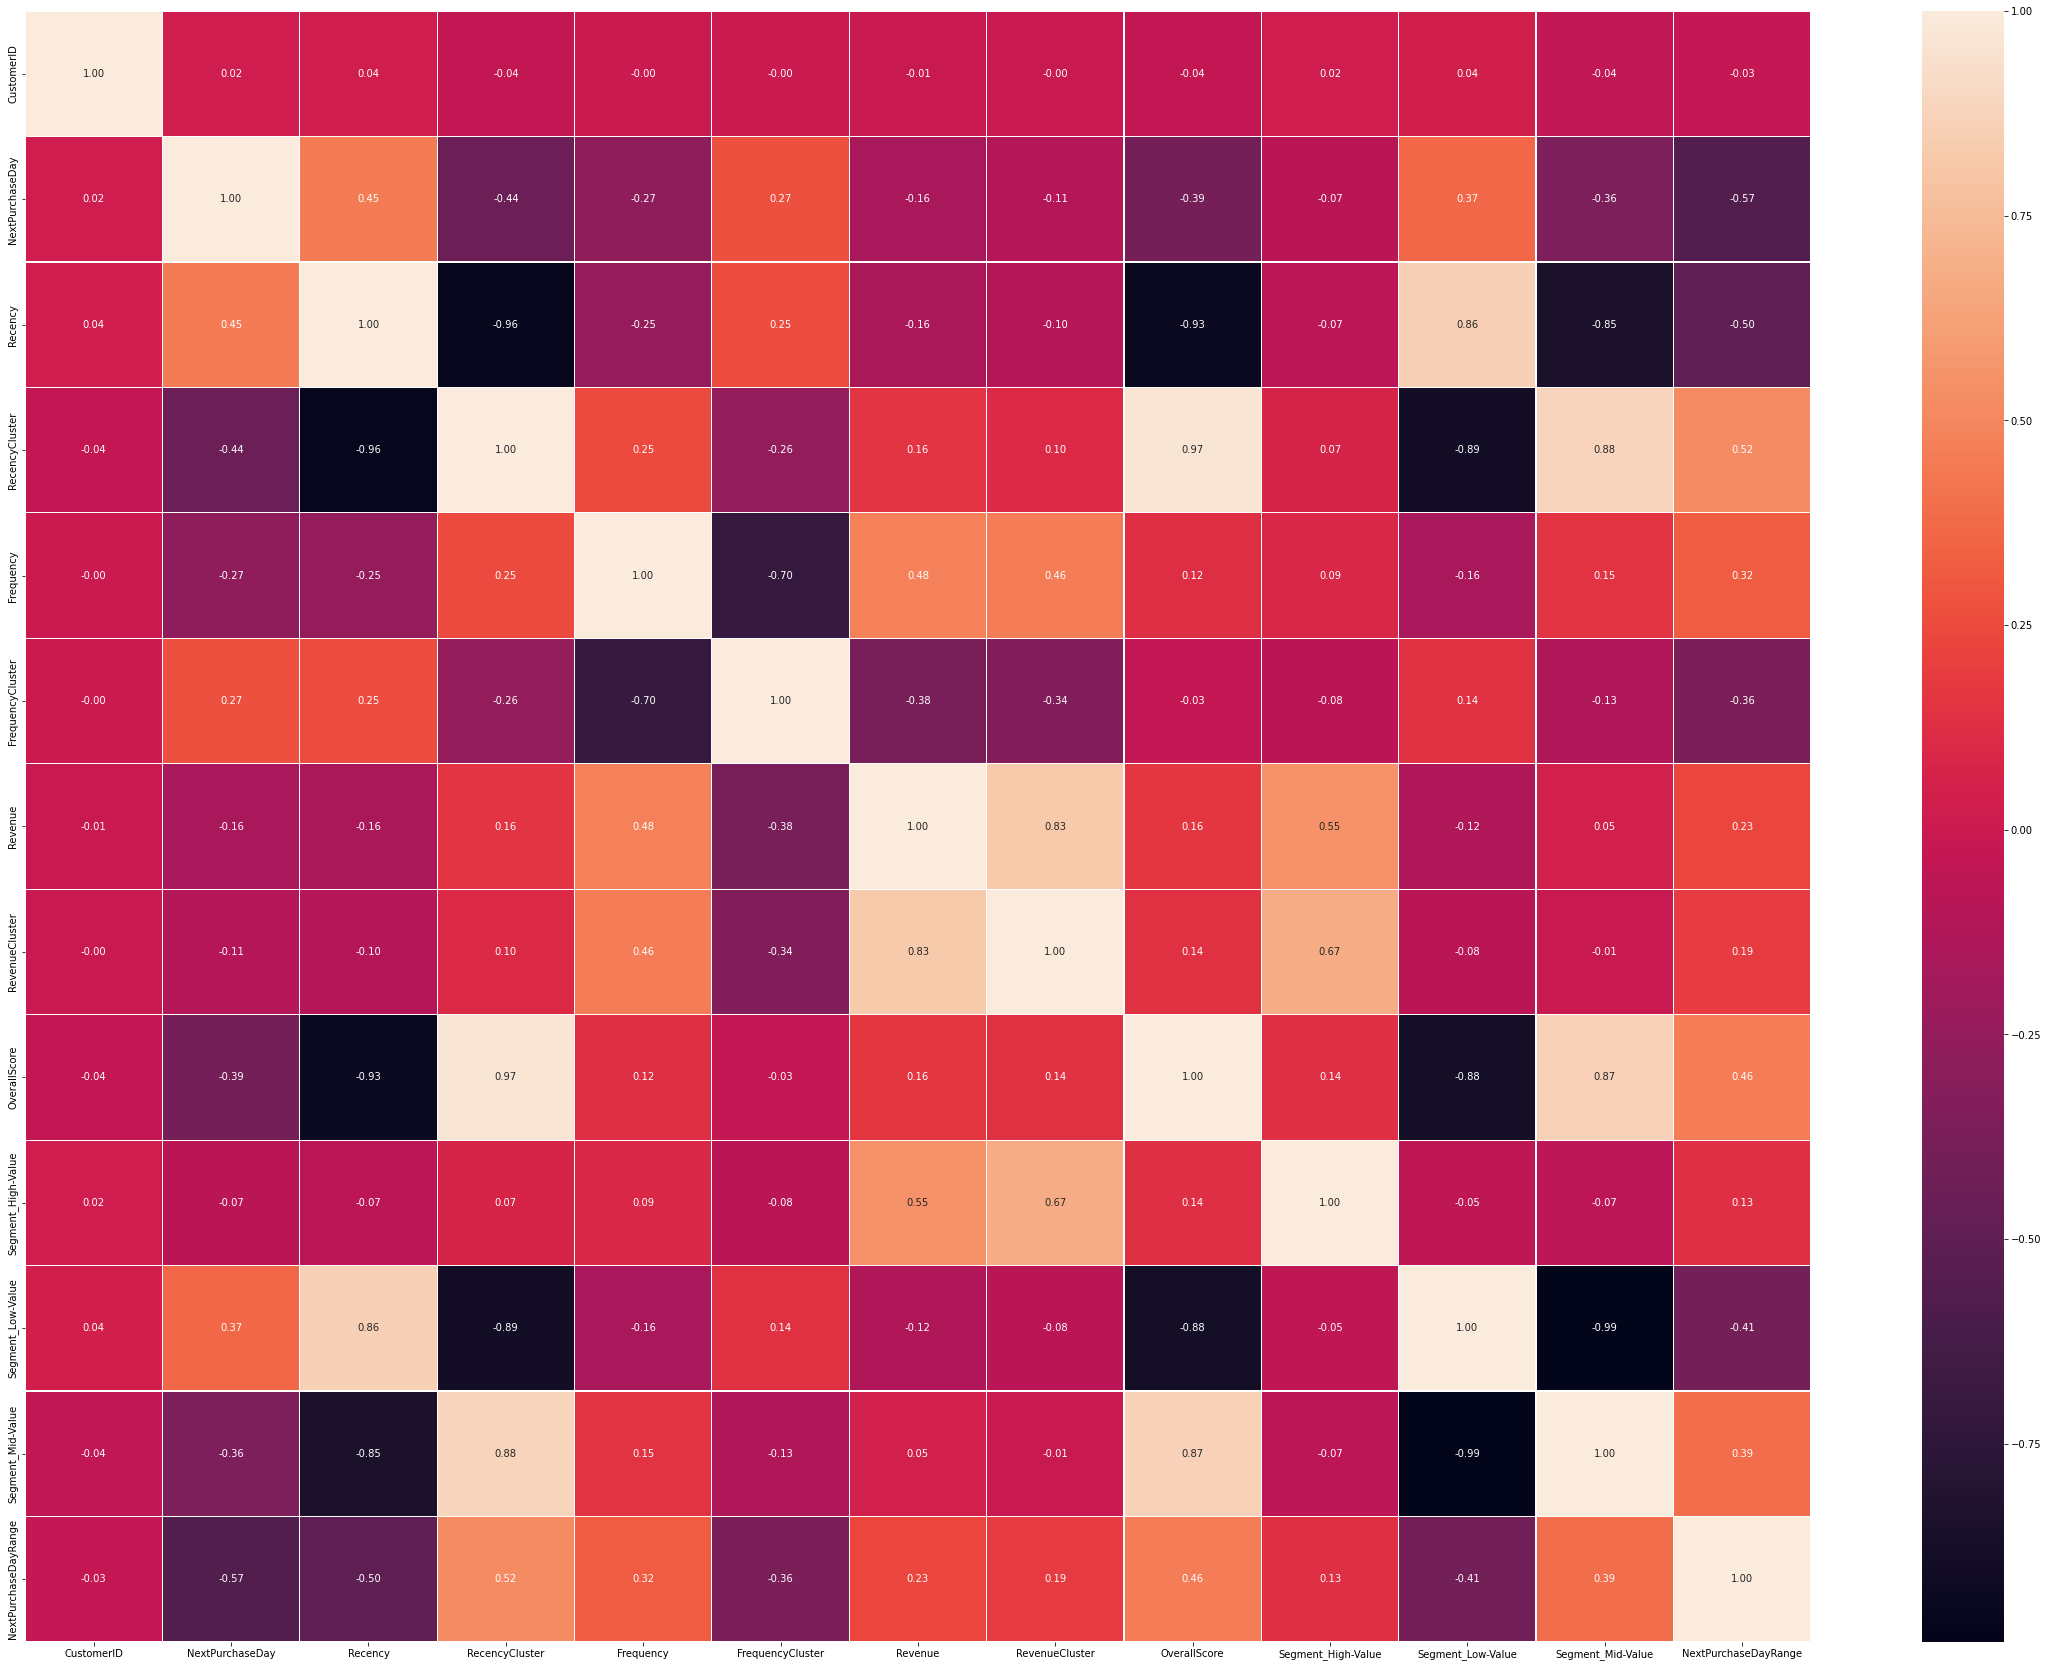

In [ ]:
plt.figure(figsize = (40, 30))
sns.heatmap(corr_matrix, annot = True, linewidths=0.2, fmt=".2f");

#Product Analysis

In [ ]:
pa = df_data.copy()

In [ ]:
cancelledInvoices = pa[pa['InvoiceNo'].astype(str).str.contains('C')]
print(f'There are a total of {len(cancelledInvoices)} cancelled orders in the given dataset.')

There are a total of 18744 cancelled orders in the given dataset.


In [ ]:
cancelledInvoices.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [ ]:
cancelledInvoices[cancelledInvoices['Quantity'] > 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Remove items which have quantity and unit price less than 0 

In [ ]:
df[df['UnitPrice'] == 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom


In [ ]:
df[df['UnitPrice'] < 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [ ]:
data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041671 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   InvoiceNo    1041671 non-null  object 
 1   StockCode    1041671 non-null  object 
 2   Description  1041671 non-null  object 
 3   Quantity     1041671 non-null  int64  
 4   InvoiceDate  1041671 non-null  object 
 5   UnitPrice    1041671 non-null  float64
 6   CustomerID   805549 non-null   float64
 7   Country      1041671 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 71.5+ MB


In [ ]:
len(data[data.duplicated()])

33757

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Removed characters from StockCode

In [ ]:
# data = data.loc[data['StockCode'].astype(str).str[1:].str.isdigit()]
# data = data.loc[data['StockCode'].astype(str).str[:-1]]
# data = data['StockCode'].select_dtypes(include='number')

data['StockCode'] = data.apply(lambda x: x['StockCode'][0:-1], axis=1)



In [ ]:
data.head(9)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,8504,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,2204,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,2123,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,2206,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,2187,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,2152,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,2235,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom


In [ ]:
product_analysis_df = data.groupby(['StockCode', 'Description']).Quantity.sum().reset_index()

In [ ]:
product_analysis_df.head()

,StockCode,Description,Quantity
0,,Adjust bad debt,1
1,,Discount,196
2,,Manual,10056
3,,SAMPLES,3
4,1000,INFLATABLE POLITICAL GLOBE,8836


Filling empty StockCode with None and then removing the None items

In [ ]:
product_analysis_df.StockCode = product_analysis_df['StockCode'].apply(lambda x: x if x.isdigit() else None) 

In [ ]:
product_analysis_df.head()

,StockCode,Description,Quantity
0,None,Adjust bad debt,1
1,None,Discount,196
2,None,Manual,10056
3,None,SAMPLES,3
4,1000,INFLATABLE POLITICAL GLOBE,8836


In [ ]:
product_analysis_df = product_analysis_df.dropna()

In [ ]:
product_analysis_df.head()

,StockCode,Description,Quantity
4,1000,INFLATABLE POLITICAL GLOBE,8836
5,10002,ROBOT PENCIL SHARPNER,4
6,1008,GROOVY CACTUS INFLATABLE,315
7,1010,BENDY COLOUR PENCILS,4
8,1012,DOGGY RUBBER,680


In [ ]:
df_pa = product_analysis_df.groupby(['StockCode', 'Description']).Quantity.sum().reset_index()
df_pa

,StockCode,Description,Quantity
0,1000,INFLATABLE POLITICAL GLOBE,8836
1,10002,ROBOT PENCIL SHARPNER,4
2,1008,GROOVY CACTUS INFLATABLE,315
3,1010,BENDY COLOUR PENCILS,4
4,1012,DOGGY RUBBER,680
...,...,...,...
5368,90214,"LETTER ""U"" BLING KEY RING",13
5369,90214,"LETTER ""V"" BLING KEY RING",41
5370,90214,"LETTER ""W"" BLING KEY RING",19
5371,90214,"LETTER ""Y"" BLING KEY RING",69


In [ ]:
ust = df_pa['StockCode'].unique()
ust

array(['1000', '10002', '1008', ..., '90211', '90212', '90214'],
      dtype=object)

List of unique StockCOde with their description and quantity

In [ ]:
fust = []
for i in ust:
  for j in range(len(df_pa)):
    # print(df_pa['StockCode'].tolist()[j] == i)
    if df_pa['StockCode'][j] == i:
      fust.append([i, df_pa['Description'][j], df_pa['Quantity'][j]])
      break
  # for j in range(len(df)):
  #   if df_pa['StockCode'][j] == i:
  #     fust.append(df['UnitPrice'][j])

print(len(fust))


1129


In [ ]:
fust_df = pd.DataFrame(fust, columns= ['StockCode', 'Description', 'Quantity'], index= None)

In [ ]:
fust_df.head()

,StockCode,Description,Quantity
0,1000,INFLATABLE POLITICAL GLOBE,8836
1,10002,ROBOT PENCIL SHARPNER,4
2,1008,GROOVY CACTUS INFLATABLE,315
3,1010,BENDY COLOUR PENCILS,4
4,1012,DOGGY RUBBER,680


In [ ]:
product_analysis_df.head()

,StockCode,Description,Quantity
4,1000,INFLATABLE POLITICAL GLOBE,8836
5,10002,ROBOT PENCIL SHARPNER,4
6,1008,GROOVY CACTUS INFLATABLE,315
7,1010,BENDY COLOUR PENCILS,4
8,1012,DOGGY RUBBER,680


Finding the top 10 products and their percentage

In [ ]:
top_products_df = fust_df.sort_values(by=['Quantity'], ascending= False)

In [ ]:
top_products_df['Percentage'] = np.round(top_products_df['Quantity']/top_products_df['Quantity'].sum() *100,2)

In [ ]:
top_products_df.head(10)

,StockCode,Description,Quantity,Percentage
722,8407,WORLD WAR 2 GLIDERS ASSTD DESIGNS,110138,5.17
886,8487,ASSORTED COLOUR BIRD ORNAMENT,81809,3.84
379,2384,"PAPER CRAFT , LITTLE BIRDIE",80995,3.81
43,1700,BROCADE RING PURSE,71430,3.36
9,1503,ASSORTED COLOURS SILK FAN,44365,2.08
845,8475,COLOUR GLASS T-LIGHT HOLDER HANGING,40839,1.92
207,2197,PACK OF 60 DINOSAUR CAKE CASES,31575,1.48
974,85099,JUMBO BAG BAROQUE BLACK WHITE,31266,1.47
583,7145,HANGING JAM JAR T-LIGHT HOLDER,30764,1.45
929,84970,HANGING HEART ZINC T-LIGHT HOLDER,27231,1.28


In [ ]:
bar_fig = px.bar(top_products_df[:10], 
                 x="StockCode", y="Percentage", color="Description", title="Individual product quantity percentage",)

bar_fig.update_layout(title_x=0, 
                      legend_title="Description", 
                      legend=dict(orientation="h")
                     )

bar_fig.show(config={'displaylogo': False})

## Recommendation 

StockCode with their respective description list 

In [ ]:
des_list = []
for i in range(len(fust)):
  d = fust[i][1].split(' ')
  des_list.append((fust[i][0], [i.lower() for i in d]))

In [ ]:
grouped_df = data.groupby("InvoiceNo")

grouped_lists = grouped_df["StockCode"].apply(list)

rmd_df = grouped_lists.reset_index()

In [ ]:
rmd_df.InvoiceNo = rmd_df['InvoiceNo'].apply(lambda x: x if x.isdigit() else None) 

In [ ]:
rmd_df = rmd_df.dropna()

In [ ]:
rmd_list = []
for i in rmd_df.StockCode:
  rmd_list.append(i)

In [ ]:
final_rmd_list = []
for i in rmd_list:
  if len(i) <= 50 and len(i) <= 100:
    final_rmd_list.append(i)
    

In [ ]:
frl = np.array(final_rmd_list)

Function for getting recomended products via StockCode

In [ ]:
def get_recommended_products(sc):
  # print(f'sc: {sc}')
  for i in final_rmd_list:
    # print(i)
    if sc in i:
      return i
      break

Done


In [ ]:
des_list

Function for StockCode from a list of query

In [ ]:
def get_stockcode(query):
  for i in des_list:
    if set(query).issubset(set(i[1])):
      return i[0]
      break

Done


In [ ]:
get_stockcode(['political', 'globe'])

'1000'

Function for getting description from StockCode

In [ ]:
def get_description(query):
  anss = []
  for i in fust:
    for j in query:
      if j in i[0]:
        anss.append(i[1])
  return anss

Done


## Sale and Price Estimation

Estimating the quantity, total revenue and price for new product

In [ ]:
new_df = fust_df.copy()
new_df.head()

,StockCode,Description,Quantity
0,1000,INFLATABLE POLITICAL GLOBE,8836
1,10002,ROBOT PENCIL SHARPNER,4
2,1008,GROOVY CACTUS INFLATABLE,315
3,1010,BENDY COLOUR PENCILS,4
4,1012,DOGGY RUBBER,680


In [ ]:
temp = data.copy()
temp.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,8504,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,2204,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,2123,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
temp = temp.groupby(['StockCode', 'UnitPrice']).Quantity.sum().reset_index()
temp.head()

,StockCode,UnitPrice,Quantity
0,,0.06,29
1,,0.08,373
2,,0.10,77
3,,0.12,4
4,,0.16,10


In [ ]:
temp.StockCode = temp.StockCode.apply(lambda x: x if x.isdigit() else None) 

In [ ]:
temp.head()

,StockCode,UnitPrice,Quantity
0,None,0.06,29
1,None,0.08,373
2,None,0.10,77
3,None,0.12,4
4,None,0.16,10


In [ ]:
temp = temp.dropna()

In [ ]:
temp.head()

,StockCode,UnitPrice,Quantity
306,1000,0.72,4376
307,1000,0.85,4267
308,1000,1.63,9
309,1000,1.66,181
310,1000,1.70,3


Summing the unit price of same StockCode

In [ ]:
t = temp.groupby(['StockCode']).UnitPrice.sum().reset_index()

In [ ]:
t

,StockCode,UnitPrice
0,1000,6.56
1,10002,10.23
2,1008,1.24
3,1010,0.42
4,1012,8.50
...,...,...
1124,90209,10.19
1125,90210,16.64
1126,90211,23.78
1127,90212,15.19


In [ ]:
tt = temp.groupby(['StockCode']).count()

In [ ]:
tt = tt.UnitPrice

In [ ]:
tt = tt.tolist()

Calculating Mean Unit Price 

In [ ]:
t['Mean_Number'] = tt

In [ ]:
t['MeanUnitPrice'] = t.UnitPrice / t.Mean_Number
t

,StockCode,UnitPrice,Mean_Number,MeanUnitPrice
0,1000,6.56,5,1.312000
1,10002,10.23,2,5.115000
2,1008,1.24,2,0.620000
3,1010,0.42,1,0.420000
4,1012,8.50,9,0.944444
...,...,...,...,...
1124,90209,10.19,5,2.038000
1125,90210,16.64,7,2.377143
1126,90211,23.78,4,5.945000
1127,90212,15.19,4,3.797500


In [ ]:
new_df.head()

,StockCode,Description,Quantity
0,1000,INFLATABLE POLITICAL GLOBE,8836
1,10002,ROBOT PENCIL SHARPNER,4
2,1008,GROOVY CACTUS INFLATABLE,315
3,1010,BENDY COLOUR PENCILS,4
4,1012,DOGGY RUBBER,680


In [ ]:
new_df['UnitPrice'] = t.MeanUnitPrice.tolist()

In [ ]:
new_df['Revenue'] = new_df.Quantity * new_df.UnitPrice

In [ ]:
new_df.head()

,StockCode,Description,Quantity,UnitPrice,Revenue
0,1000,INFLATABLE POLITICAL GLOBE,8836,1.312000,11592.832000
1,10002,ROBOT PENCIL SHARPNER,4,5.115000,20.460000
2,1008,GROOVY CACTUS INFLATABLE,315,0.620000,195.300000
3,1010,BENDY COLOUR PENCILS,4,0.420000,1.680000
4,1012,DOGGY RUBBER,680,0.944444,642.222222


Creating a list of StockCode, Description, Quantity, Unti Price and Revenue

In [ ]:
final_sales_list = []
for i in range(len(new_df)):
  final_sales_list.append((new_df.StockCode[i], new_df.Description[i].lower().split(" "), new_df.Quantity[i], new_df.UnitPrice[i], new_df.Revenue[i]))
final_sales_list[0]

('1000',
 ['inflatable', 'political', 'globe', ''],
 8836,
 1.3119999999999998,
 11592.831999999999)

Function for estimating sales price, revenue and quantity

In [ ]:
def sales_price_estimate(query):
  sales_estimates = []
  for i in range(len(final_sales_list)):
    if query in final_sales_list[i][1]:
      sales_estimates.append((final_sales_list[i][0], get_description([final_sales_list[i][0]]), final_sales_list[i][2], final_sales_list[i][3], final_sales_list[i][4]))
  selling_price = 0
  revenue = 0
  quantity = 0
  for i in sales_estimates:
    revenue += i[4]
    selling_price += i[3]
    quantity += i[2]
  avg_selling_price = selling_price/len(sales_estimates)
  avg_revenue = revenue/len(sales_estimates)
  avg_quantity = quantity/len(sales_estimates)
  return np.around(avg_selling_price), np.around(avg_revenue), np.around(avg_quantity)

In [ ]:
esp, er, eq = sales_price_estimate('bottle')

In [ ]:
print(f'Avg selling price would be: {esp}')
print(f'Avg revenue would be: {er}')
print(f'Avg quantity would be: {eq}')

Avg selling price would be: 4.0
Avg revenue would be: 5778.0
Avg quantity would be: 1204.0


# Flask Deployment

For recommendation

In [ ]:
# def sol():
#     try:
#       # df = pd.read_csv('/home/zsiecr/online_retail_II.csv')
#       df = pd.read_csv('online_retail_II.csv')
#       df.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
#       df_data = df.dropna()
#       df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
#       #   pa = df_data.copy()
#       data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]
#       data['StockCode'] = data.apply(lambda x: x['StockCode'][0:-1], axis=1)
#       product_analysis_df = data.groupby(['StockCode', 'Description']).Quantity.sum().reset_index()
#       product_analysis_df.StockCode = product_analysis_df['StockCode'].apply(lambda x: x if x.isdigit() else None)
#       product_analysis_df = product_analysis_df.dropna()
#       df_pa = product_analysis_df.groupby(['StockCode', 'Description']).Quantity.sum().reset_index()
#       ust = df_pa['StockCode'].unique()
#       fust = []
#       for i in ust:
#           for j in range(len(df_pa)):
#           # print(df_pa['StockCode'].tolist()[j] == i)
#               if df_pa['StockCode'][j] == i:
#                   fust.append([i, df_pa['Description'][j], df_pa['Quantity'][j]])
#                   break
#         # for j in range(len(df)):
#         #   if df_pa['StockCode'][j] == i:
#         #     fust.append(df['UnitPrice'][j])

#       # print(len(fust))
#       fust_df = pd.DataFrame(fust, columns= ['StockCode', 'Description', 'Quantity'], index= None)
#       des_list = []
#       for i in range(len(fust)):
#           d = fust[i][1].split(' ')
#           des_list.append((fust[i][0], [i.lower() for i in d]))
#       grouped_df = data.groupby("InvoiceNo")

#       grouped_lists = grouped_df["StockCode"].apply(list)

#       rmd_df = grouped_lists.reset_index()

#       rmd_df.InvoiceNo = rmd_df['InvoiceNo'].apply(lambda x: x if x.isdigit() else None)
#       rmd_df = rmd_df.dropna()
#       rmd_list = []
#       for i in rmd_df.StockCode:
#           rmd_list.append(i)
#       final_rmd_list = []
#       for i in rmd_list:
#           if len(i) <= 50 and len(i) <= 100:
#               final_rmd_list.append(i)
#       def get_recommended_products(sc):
#           # print(f'sc: {sc}')
#           for i in final_rmd_list:
#               # print(i)
#               if sc in i:
#                   return i
#                   break
#       def get_stockcode(query):
#           for i in des_list:
#               if set(query).issubset(set(i[1])):
#                   return i[0]
#                   break

#       def get_description(query):
#         anss = []
#         for i in fust:
#           for j in query:
#               if j in i[0]:
#                   anss.append(i[1])
#         return anss
#       new_df = fust_df.copy()
#       temp = data.copy()
#       temp = temp.groupby(['StockCode', 'UnitPrice']).Quantity.sum().reset_index()
#       temp.StockCode = temp.StockCode.apply(lambda x: x if x.isdigit() else None)
#       temp = temp.dropna()
#       t = temp.groupby(['StockCode']).UnitPrice.sum().reset_index()
#       tt = temp.groupby(['StockCode']).count()
#       tt = tt.UnitPrice
#       tt = tt.tolist()
#       t['Mean_Number'] = tt
#       t['MeanUnitPrice'] = t.UnitPrice / t.Mean_Number
#       new_df['UnitPrice'] = t.MeanUnitPrice.tolist()
#       new_df['Revenue'] = new_df.Quantity * new_df.UnitPrice

#       final_sales_list = []
#       for i in range(len(new_df)):
#           final_sales_list.append((new_df.StockCode[i], new_df.Description[i].lower().split(" "), new_df.Quantity[i], new_df.UnitPrice[i], new_df.Revenue[i]))

#       def sales_price_estimate(query):
#           sales_estimates = []
#           for i in range(len(final_sales_list)):
#               if query in final_sales_list[i][1]:
#                   sales_estimates.append((final_sales_list[i][0], get_description([final_sales_list[i][0]]), final_sales_list[i][2], final_sales_list[i][3], final_sales_list[i][4]))
#           selling_price = 0
#           revenue = 0
#           quantity = 0
#           for i in sales_estimates:
#               revenue += i[4]
#               selling_price += i[3]
#               quantity += i[2]
#           avg_selling_price = selling_price/len(sales_estimates)
#           avg_revenue = revenue/len(sales_estimates)
#           avg_quantity = quantity/len(sales_estimates)
#           return np.around(avg_selling_price), np.around(avg_revenue), np.around(avg_quantity)

#       dict_rmd = {}
#       # dict_rmd['get_recommend'] = str(request.args['get_recommend'])
#       dict_rmd['get_recommend'] = 'pencil'

#       list_rmd = dict_rmd['get_recommend'].split(' ')

#       sc = get_stockcode(list_rmd)
#       rmd =  get_recommended_products(sc)
#       frp = get_description(rmd)
#       print(frp)
#     except :
#       print('No Recommendations at this time!')

For Sales price  Estimation

In [ ]:
# def sol2():
#     try:
#       df = pd.read_csv('/home/zsiecr/online_retail_II.csv')
#       # df = pd.read_csv('online_retail_II.csv')
#       df.rename(columns={'Invoice':'InvoiceNo', 'Customer ID':'CustomerID', 'Price':'UnitPrice'}, inplace=True)
#       df_data = df.dropna()
#       df_data.InvoiceDate = pd.to_datetime(df_data.InvoiceDate)
#       #   pa = df_data.copy()
#       data = df[(df['UnitPrice'] > 0) & (df['Quantity']>0)]
#       data['StockCode'] = data.apply(lambda x: x['StockCode'][0:-1], axis=1)
#       product_analysis_df = data.groupby(['StockCode', 'Description']).Quantity.sum().reset_index()
#       product_analysis_df.StockCode = product_analysis_df['StockCode'].apply(lambda x: x if x.isdigit() else None)
#       product_analysis_df = product_analysis_df.dropna()
#       df_pa = product_analysis_df.groupby(['StockCode', 'Description']).Quantity.sum().reset_index()
#       ust = df_pa['StockCode'].unique()
#       fust = []
#       for i in ust:
#           for j in range(len(df_pa)):
#           # print(df_pa['StockCode'].tolist()[j] == i)
#               if df_pa['StockCode'][j] == i:
#                   fust.append([i, df_pa['Description'][j], df_pa['Quantity'][j]])
#                   break
#         # for j in range(len(df)):
#         #   if df_pa['StockCode'][j] == i:
#         #     fust.append(df['UnitPrice'][j])

#       # print(len(fust))
#       fust_df = pd.DataFrame(fust, columns= ['StockCode', 'Description', 'Quantity'], index= None)

#       def get_description(query):
#         anss = []
#         for i in fust:
#           for j in query:
#               if j in i[0]:
#                   anss.append(i[1])
#         return anss
      
#       new_df = fust_df.copy()
#       temp = data.copy()
#       temp = temp.groupby(['StockCode', 'UnitPrice']).Quantity.sum().reset_index()
#       temp.StockCode = temp.StockCode.apply(lambda x: x if x.isdigit() else None)
#       temp = temp.dropna()
#       t = temp.groupby(['StockCode']).UnitPrice.sum().reset_index()
#       tt = temp.groupby(['StockCode']).count()
#       tt = tt.UnitPrice
#       tt = tt.tolist()
#       t['Mean_Number'] = tt
#       t['MeanUnitPrice'] = t.UnitPrice / t.Mean_Number
#       new_df['UnitPrice'] = t.MeanUnitPrice.tolist()
#       new_df['Revenue'] = new_df.Quantity * new_df.UnitPrice

#       final_sales_list = []
#       for i in range(len(new_df)):
#           final_sales_list.append((new_df.StockCode[i], new_df.Description[i].lower().split(" "), new_df.Quantity[i], new_df.UnitPrice[i], new_df.Revenue[i]))

#       def sales_price_estimate(query):
#           sales_estimates = []
#           for i in range(len(final_sales_list)):
#               if query in final_sales_list[i][1]:
#                   sales_estimates.append((final_sales_list[i][0], get_description([final_sales_list[i][0]]), final_sales_list[i][2], final_sales_list[i][3], final_sales_list[i][4]))
#           selling_price = 0
#           revenue = 0
#           quantity = 0
#           for i in sales_estimates:
#               revenue += i[4]
#               selling_price += i[3]
#               quantity += i[2]
#           avg_selling_price = selling_price/len(sales_estimates)
#           avg_revenue = revenue/len(sales_estimates)
#           avg_quantity = quantity/len(sales_estimates)
#           return np.around(avg_selling_price), np.around(avg_revenue), np.around(avg_quantity)
      
#       dict_rmd = {}
#       dict_rmd['get_recommend'] = str(request.args['get_recommend'])
#       # dict_rmd['get_sales'] = 'pencil'

#       list_rmd = dict_rmd['get_sales']

#       asp, ar, aq = sales_price_estimate(list_rmd)
      
#       print(f'asp: {asp}, ar: {ar} , aq: {aq}' )
    
#     except :
#       print('No Estimations at this time!')



---
---
## Link for the Power Point Presentation: [#PSGS PPT](https://docs.google.com/presentation/d/1jScEDiNwb5U0ipDsrdeq55dS9zpHZCKiaRiRj7Rdsk4/edit?usp=sharing)

## Link for the Prototype: [#PGSG Prototype](http://localhost:3000)

<!-- #Link for Demo Video: [#PSGS Demo Video]() -->

---
---

\begin{align}
         Thank\ You!
    \end{align}